In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv("weatherAUS.csv", encoding="ISO-8859-1")

In [8]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


# EDA

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [10]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [11]:
df.shape

(142193, 24)

In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [13]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          679
Evaporation       356
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RISK_MM           681
RainTomorrow        2
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [15]:
df.isna().sum() 

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

# Feature Selection:

In [16]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [17]:
df = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']]


# Data Cleaning

In [18]:
df = df.fillna(df.mean())
df = df.dropna()
df.drop_duplicates(inplace = True)

In [19]:
print(df.isna().sum())
print(df.shape)

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
(123710, 22)


In [20]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,12.413911,23.474810,2.375661,5.552317,7.675574,40.685280,15.011689,19.174578,67.664012,50.856208,1017.416988,1015.029675,4.418535,4.495993,17.268851,21.895730
std,6.366792,7.205898,8.528039,3.245596,2.782148,13.388636,8.307285,8.571039,18.975484,20.839546,6.765700,6.703823,2.280928,2.124810,6.477883,7.005864
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.800000,18.100000,0.000000,4.200000,7.624853,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.700000,3.000000,4.000000,12.500000,16.800000
50%,12.200000,23.000000,0.000000,5.469824,7.624853,39.000000,13.000000,19.000000,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.500000
75%,17.000000,28.600000,0.800000,5.600000,9.000000,48.000000,20.000000,24.000000,81.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.900000,26.700000
max,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


# What is the average rainfall in Cairns ?

In [21]:
n1 = df[(df["Location"]=="Cairns")]
print("Average rainfall in Cairns: {:.2f}".format(np.mean(n1["Rainfall"])))

Average rainfall in Cairns: 5.68


# Which place has the rainfall above 200 cm?

In [22]:
n2 = df.sort_values("Rainfall")
n3 = n2[n2["Rainfall"]>200]
print(n3[["Location","Rainfall"]].to_string(index=False))

     Location  Rainfall
       Cairns     206.2
   Townsville     206.8
 CoffsHarbour     208.5
       Darwin     210.6
 CoffsHarbour     219.6
  Williamtown     225.0
   Townsville     236.8
       Cairns     247.2
       Cairns     268.6
       Cairns     278.4
       Darwin     367.6


In [23]:
lae=LabelEncoder()
df["Location"] = lae.fit_transform(df["Location"].astype(str))
df["WindGustDir"] = lae.fit_transform(df["WindGustDir"].astype(str))
df["WindDir9am"] = lae.fit_transform(df["WindDir9am"].astype(str))
df["WindDir3pm"] = lae.fit_transform(df["WindDir3pm"].astype(str))
df["RainToday"] = lae.fit_transform(df["RainToday"].astype(str))
df["RainTomorrow"] = lae.fit_transform(df["RainTomorrow"].astype(str))

In [24]:
df.describe().columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

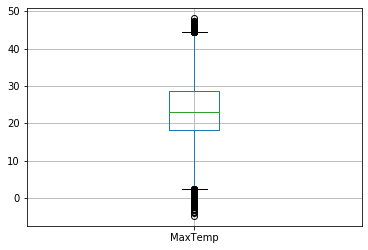

In [25]:
_ = df.boxplot(column=['MaxTemp'])

In [26]:
df = df[(df["MaxTemp"] > 2) & (df["MaxTemp"]  < 43)]
df.shape

(123219, 22)

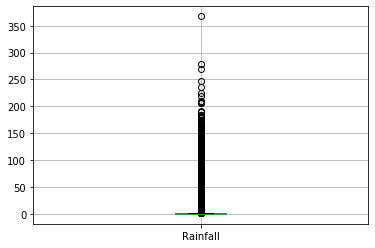

In [27]:
_ = df.boxplot(column=['Rainfall'])

In [28]:
df = df[df["Rainfall"]<5]
df.shape

(108872, 22)

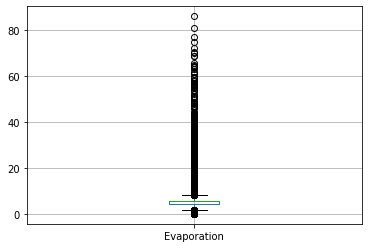

In [29]:
_ = df.boxplot(column=['Evaporation'])

In [30]:
df = df[df["Evaporation"]<8]
df.shape

(93550, 22)

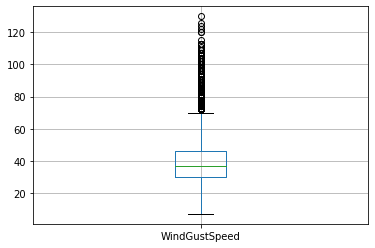

In [31]:
_ = df.boxplot(column=['WindGustSpeed'])

In [32]:
df = df[df["WindGustSpeed"]<78]
df.shape

(92455, 22)

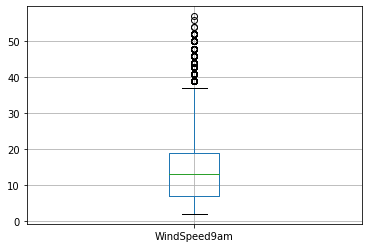

In [33]:
_ = df.boxplot(column=['WindSpeed9am'])

In [34]:
df = df[df["WindSpeed9am"]<41]
df.shape

(92036, 22)

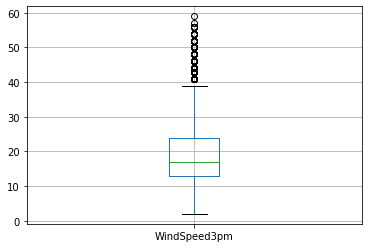

In [35]:
_ = df.boxplot(column=['WindSpeed3pm'])

In [36]:
df = df[df["WindSpeed3pm"]<41]
df.shape

(91065, 22)

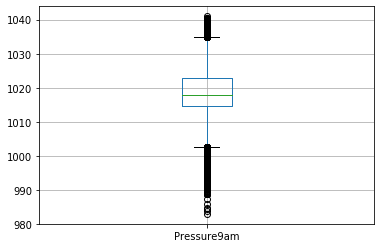

In [37]:
_ = df.boxplot(column=['Pressure9am'])

In [38]:
df = df[(df["Pressure9am"]>1003) & (df["Pressure9am"]<1035)]
df.shape

(89526, 22)

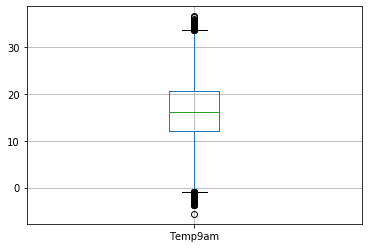

In [39]:
_ = df.boxplot(column=['Temp9am'])

In [40]:
df = df[df["Temp9am"]<34]
df.shape

(89485, 22)

In [41]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,...,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000
mean,22.606392,11.356227,22.767206,0.410421,4.731135,7.622338,7.645460,38.109393,7.249919,7.639191,...,68.574196,50.660829,1018.705120,1016.176455,4.407693,4.486044,16.397764,21.289934,0.131419,0.180466
std,13.555544,6.128732,6.563917,0.950382,1.643198,2.521364,4.641121,11.359370,4.543662,4.585137,...,17.195992,19.081089,6.044351,6.097132,2.165043,2.023616,6.064602,6.388632,0.337860,0.384577
min,0.000000,-8.200000,2.100000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,3.000000,1.000000,1003.100000,989.800000,0.000000,0.000000,-5.600000,-2.600000,0.000000,0.000000
25%,11.000000,7.000000,17.900000,0.000000,3.800000,7.624853,3.000000,30.000000,3.000000,4.000000,...,58.000000,37.000000,1014.800000,1012.200000,4.000000,4.000000,12.000000,16.700000,0.000000,0.000000
50%,23.000000,11.000000,22.300000,0.000000,5.469824,7.624853,8.000000,37.000000,7.000000,8.000000,...,69.000000,51.000000,1018.000000,1015.400000,4.437189,4.503167,16.100000,20.900000,0.000000,0.000000
75%,34.000000,15.600000,27.300000,0.200000,5.469824,8.500000,12.000000,44.000000,11.000000,12.000000,...,81.000000,63.000000,1022.700000,1020.300000,6.000000,6.000000,20.600000,25.600000,0.000000,0.000000
max,46.000000,30.200000,42.900000,4.900000,7.900000,14.300000,15.000000,76.000000,15.000000,15.000000,...,100.000000,100.000000,1034.900000,1034.900000,9.000000,8.000000,33.900000,42.300000,1.000000,1.000000


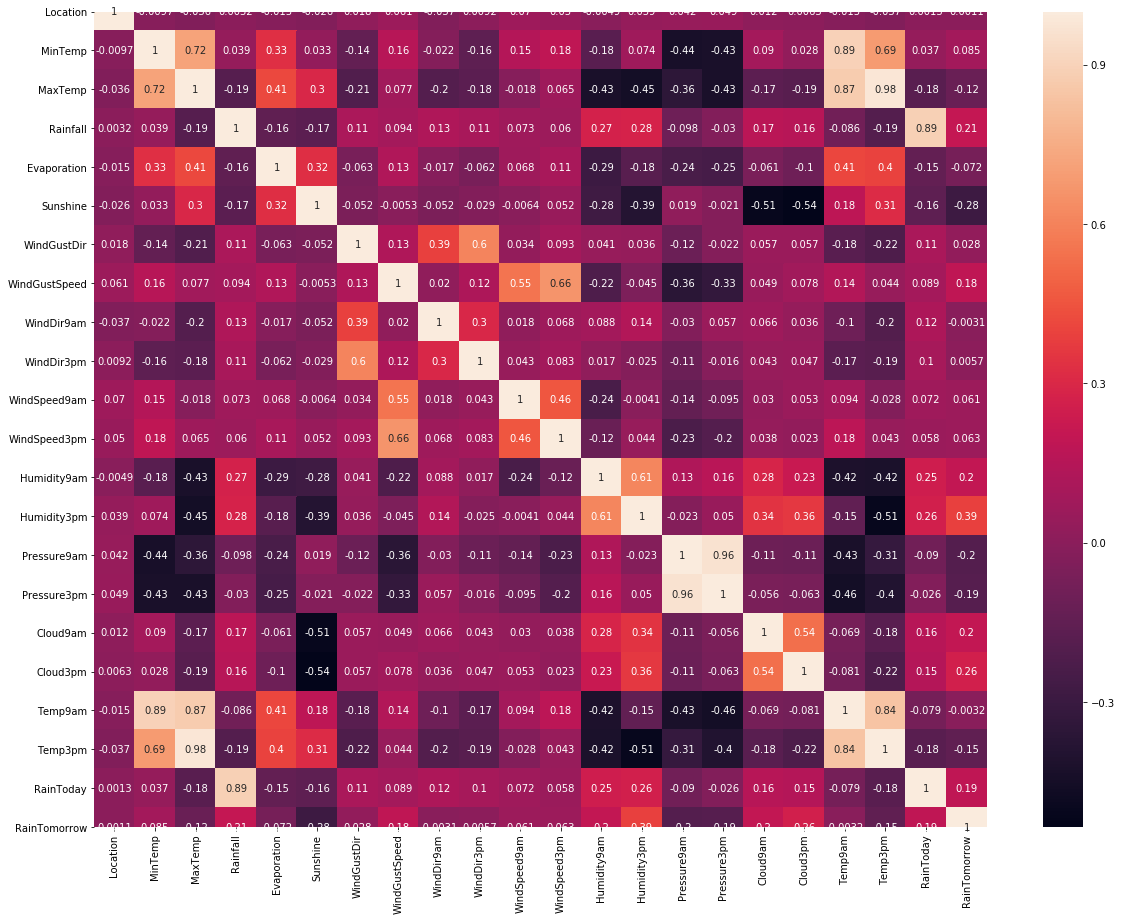

In [42]:
corelation = df.corr()
plt.subplots(figsize=(20,15))
_ = sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

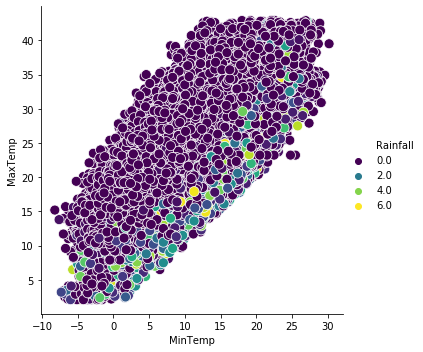

In [43]:
_ = sns.relplot(x="MinTemp",y="MaxTemp",hue="Rainfall",palette="viridis",data=df,s=100)

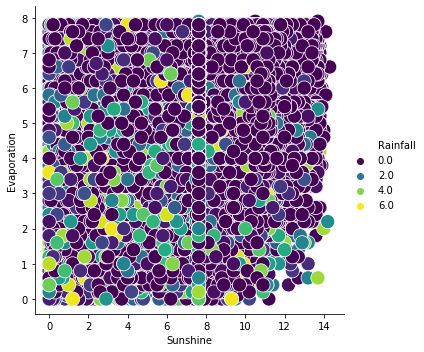

In [44]:
_ = sns.relplot(x="Sunshine",y="Evaporation",hue="Rainfall",palette="viridis",data=df,s=200)

In [45]:
X=df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']].values
Y=df[['RainTomorrow']].values

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

# Logistic Regression

In [47]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred1=lr.predict(X_test)
accuracy_score(Y_test,Y_pred1)

C:\Users\amanv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amanv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8603611657428929

# K-Nearest Neighbors (KNN)

In [48]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,Y_train)
Y_pred2=knn.predict(X_test)
accuracy_score(Y_test,Y_pred2)

C:\Users\amanv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.8607634543178974

# Support Vector Machine (SVM)

In [49]:
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred3=svc.predict(X_test)
accuracy_score(Y_test,Y_pred3)

C:\Users\amanv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\amanv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8237976041480422